**About the dataset**

The Dataset has 4 factors (X,Y) – Assuming they are coordinates of the affected spatial area. Month and day
<br>•	X – is the x coordinate of the affected area
<br>•	Y – is the y coordinate of the affected area
<br>•	Month – Month
<br>•	Day – Day
<br>•	FFMC - Fire Fuel moisture conduct if greater than 90 – Extreme damage, between 90-70 – moderate Damage and below 70 is low damage. Thus, can be used categorically.
<br>•	DMC - Duff moisture code. DMC rating above 40 indicates high likelihood of extreme burning.
<br>•	DC - Drought Code. DC rating about 300 is extreme damage, between 200-300 moderate damage and less than 200 less damage.
<br>•	ISI - initial spread index. Usually around 1- 10 with 10 being high spread of fire, anything above 16 indicates extreme fire.
<br>•	Temp – Temperature – anything above 25 degrees Celsius would contribute to the spread of fire.
<br>•	RH - Relative Humidity. Higher the Relative humidity, higher the spread
<br>•	Wind – wind speed, higher the wind flow, higher the spread
<br>•	Rain – outside rain, if rain occurs then reduces/ lowers the spread.
<br>•	Area – burned area.

RH, Wind, Rain, temperature contribute to FWI – Fire Weather Index. Thus each of these categories play a role in identifying the impact on


**1.1 Download the dataset**

**Importing the Libraries**



In [171]:
'''
Import Libraries/Dataset
Important points about Forest Fire KPIs:
FFMC - File Fuel Moisture Conduct
DMC - Duff moisture code
DC - Drought Code
ISI - Initial Spread Index
RH - Relative Humidity
'''
import pandas as pd # data processing
import matplotlib.pyplot as plt #plot package
from sklearn.model_selection import train_test_split
import numpy as np
import seaborn as sns                  # for data visualisation
from sklearn.linear_model import LinearRegression
from scipy.stats import zscore

# from sklearn.model_selection import cross_val_score  # importing cross value score formula
# from sklearn.model_selection import KFold             # importing K-fold formula
from sklearn.metrics import mean_squared_error, r2_score   #  # importing mean square error formula


**Importing the dataset into dataframe**

In [172]:

#Reading dataset
forest_tbl = pd.read_csv("forestfires.csv")

**2. Data Visualization and Exploration**

**2.1 Print 2 rows for sanity check to identify all the features present in the dataset and if the target matches with them.**
	<br>This figure gives us first 2 rows of the given dataset with 9 columns and our dependent variable being “area” factors of which would be FFMC, DMC, DC, ISI, temp, RH, wind & rain. Based on the below table,


In [173]:
'''
Data Visualization and Exploration [1M]
Print 2 rows for sanity check to identify all the features present in the dataset and if the
target matches with them.
'''
#Printing first 2 rows of the dataset
# print(forest_tbl.iloc[:2])
forest_tbl.head(2)
#Combining x,y axis

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0
1,7,4,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0


**2.2 Comment on class imbalance with appropriate visualization method.**
<br>Considering below charts and output the spread and the standard deviation I understand that FFMC & ISI being important factors are not evenly spread out in the dataset, however the other main factors are evenly spread out which will help us train the model better.  

In [174]:
forest_tbl.isnull().sum()

X        0
Y        0
month    0
day      0
FFMC     0
DMC      0
DC       0
ISI      0
temp     0
RH       0
wind     0
rain     0
area     0
dtype: int64

In [175]:
#forest_tbl.info tells us that there are is null data in the dataset with the total row count of 517
forest_tbl.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X       517 non-null    int64  
 1   Y       517 non-null    int64  
 2   month   517 non-null    object 
 3   day     517 non-null    object 
 4   FFMC    517 non-null    float64
 5   DMC     517 non-null    float64
 6   DC      517 non-null    float64
 7   ISI     517 non-null    float64
 8   temp    517 non-null    float64
 9   RH      517 non-null    int64  
 10  wind    517 non-null    float64
 11  rain    517 non-null    float64
 12  area    517 non-null    float64
dtypes: float64(8), int64(3), object(2)
memory usage: 52.6+ KB


<br>Therefore, our training model would be based on as below –
Dependent variable – area (Value that needs to be predicted)
Independent Variable – DMC, DC, temp, RH, wind


In [176]:
forest_tbl.describe(include="all", percentiles = [0.1, 0.25, 0.5, 0.75, 0.9, 0.95])

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
count,517.000000,517.000000,517,517,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000
unique,NaN,NaN,12,7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,aug,sun,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,184,95,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,4.669246,4.299807,NaN,NaN,90.644681,110.872340,547.940039,9.021663,18.889168,44.288201,4.017602,0.021663,12.847292
std,2.313778,1.229900,NaN,NaN,5.520111,64.046482,248.066192,4.559477,5.806625,16.317469,1.791653,0.295959,63.655818
min,1.000000,2.000000,NaN,NaN,18.700000,1.100000,7.900000,0.000000,2.200000,15.000000,0.400000,0.000000,0.000000
10%,2.000000,3.000000,NaN,NaN,85.900000,25.700000,80.800000,3.800000,11.200000,27.000000,1.800000,0.000000,0.000000
25%,3.000000,4.000000,NaN,NaN,90.200000,68.600000,437.700000,6.500000,15.500000,33.000000,2.700000,0.000000,0.000000
50%,4.000000,4.000000,NaN,NaN,91.600000,108.300000,664.200000,8.400000,19.300000,42.000000,4.000000,0.000000,0.520000


In [177]:
'''
Understanding scale of non-numerical features
'''
forest_tbl.month.unique()

array(['mar', 'oct', 'aug', 'sep', 'apr', 'jun', 'jul', 'feb', 'jan',
       'dec', 'may', 'nov'], dtype=object)

In [178]:
forest_tbl.day.unique()

array(['fri', 'tue', 'sat', 'sun', 'mon', 'wed', 'thu'], dtype=object)



---


**Inferences from analysing dataframe from provided dataset, information 2 header rows and series information of dataframe**


---


There are 13 columns, there is no missing data in all the columns.

Given data set:  the forest fire information, amount of area got affected by fire in each incident and different parameters like rain, temp, etc.

Total number of records are 517.

Area = 0 means fire didnt occur for that event when data was recorded.

Output column we are considering the last column 'Area' dependent on the rest of the columns (1-12)



---


**2.3 Provide appropriate visualizations to get an insight about the dataset.**

Text(0.5, 1.0, 'Scatterplot-Area')

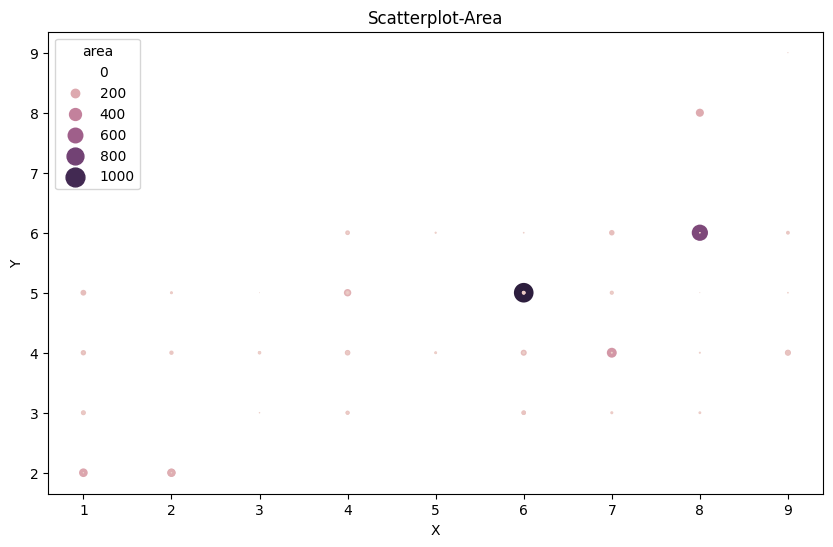

In [179]:
'''
Plot X & Y
'''
# plt.scatter(forest_tbl.X, forest_tbl.Y)
plt.figure(figsize=(10,6))
sns.scatterplot(data=forest_tbl,x='X',y='Y',hue='area',size='area',sizes=(0,200))
plt.title('Scatterplot-Area')

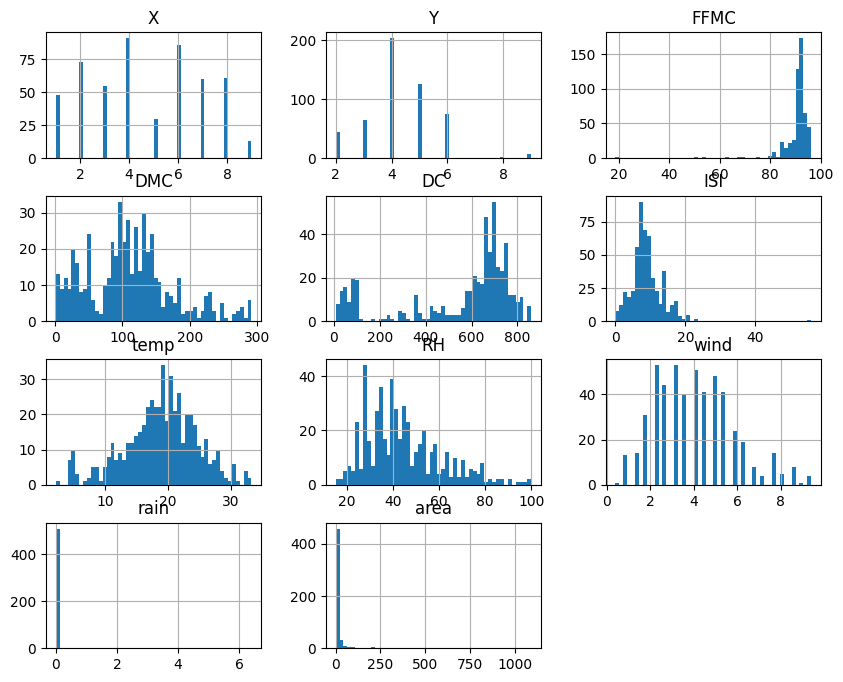

In [180]:
#plotting each value
forest_tbl.hist(bins=50, figsize=(10, 8))
plt.show()


**Skewness of data can be interpreted by looking the data i.e. Standard deviation vs mean value or visually by looking at the bell curve**

**Data positively skewed: ISI Rain, area**

**Data negatively skewed: FFMC, DC, temp**

**2.4 Do the correlational analysis on the dataset. Provide a visualization for the same.**

**Will this correlational analysis have an effect on feature selection that you will perform in the next step?**
<br>
Correlation can be positive or negative, as the below graph suggests there is a positive correlation between FFMC and ISI, which lets us to believe that increase in temperature leads to higher FFMC. Similarly, a negative co-efficient value suggest that higher the value, will lead to negative, as shown in relationship between RH and Temperature (temp). This correlation factor is calculated on the basis of Pearson’s coefficient which helps in understanding the strength of linear relationship between 2 variables.

<ipython-input-181-14a5ab94d7ce>:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(forest_tbl.corr(),annot=True)


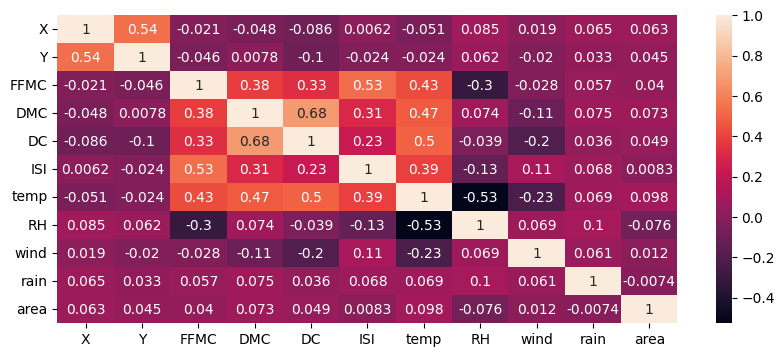

In [181]:
# forest_tbl.corr().style.background_gradient(cmap='Blues')

plt.figure(figsize=(10,4))
sns.heatmap(forest_tbl.corr(),annot=True)
plt.show()

**Correlation inferences**

1. DMC and DC are closest correlated (their value being highest 0.68), while the value is more than 0.5 it also remains less than 0.75. Hence we cannot drop either of the columns.
2. No major change in correlation values observed after the change of area value to its log value. Which means the data characteristics are maintained.

---
**3.1 Pre-processing the data**

<br>•	Looking for null values
<br>•	Look for blank values and replace them with 0.
<br>•	Creating xy-axis column

In [182]:
'''

1.	Do the appropriate pre-processing of the data like identifying NULL or Missing Values if any, handling of outliers if present in the dataset, skewed data etc. Mention the preprocessing steps performed in the markdown cell. Explore few latest data balancing tasks and its effect on model evaluation parameters.
Step 1 - Check For Null Values
'''
forest_tbl.isnull()

'''
Step 2 - Look for blank rows and them with 0
'''
forest_tbl.fillna(0)
forest_tbl["xy-axis"] = "(" + forest_tbl['X'].astype(str)+","+forest_tbl['Y'].astype(str)+")"
print(forest_tbl)


     X  Y month  day  FFMC    DMC     DC   ISI  temp  RH  wind  rain   area  \
0    7  5   mar  fri  86.2   26.2   94.3   5.1   8.2  51   6.7   0.0   0.00   
1    7  4   oct  tue  90.6   35.4  669.1   6.7  18.0  33   0.9   0.0   0.00   
2    7  4   oct  sat  90.6   43.7  686.9   6.7  14.6  33   1.3   0.0   0.00   
3    8  6   mar  fri  91.7   33.3   77.5   9.0   8.3  97   4.0   0.2   0.00   
4    8  6   mar  sun  89.3   51.3  102.2   9.6  11.4  99   1.8   0.0   0.00   
..  .. ..   ...  ...   ...    ...    ...   ...   ...  ..   ...   ...    ...   
512  4  3   aug  sun  81.6   56.7  665.6   1.9  27.8  32   2.7   0.0   6.44   
513  2  4   aug  sun  81.6   56.7  665.6   1.9  21.9  71   5.8   0.0  54.29   
514  7  4   aug  sun  81.6   56.7  665.6   1.9  21.2  70   6.7   0.0  11.16   
515  1  4   aug  sat  94.4  146.0  614.7  11.3  25.6  42   4.0   0.0   0.00   
516  6  3   nov  tue  79.5    3.0  106.7   1.1  11.8  31   4.5   0.0   0.00   

    xy-axis  
0     (7,5)  
1     (7,4)  
2     (7,

**3.2 Standardization and Normalization of data**


**Spread: Balanced**
<br>•	Scatter plot to identify if outliers exists in RH, DMC, DC, temp, wind data – Equally spread data (Balanced Data)

<Axes: xlabel='xy-axis', ylabel='wind'>

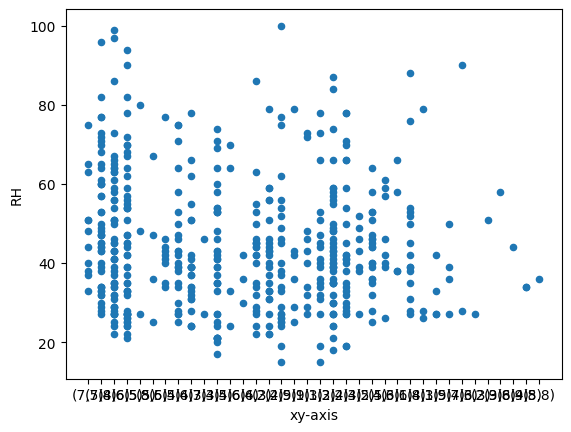

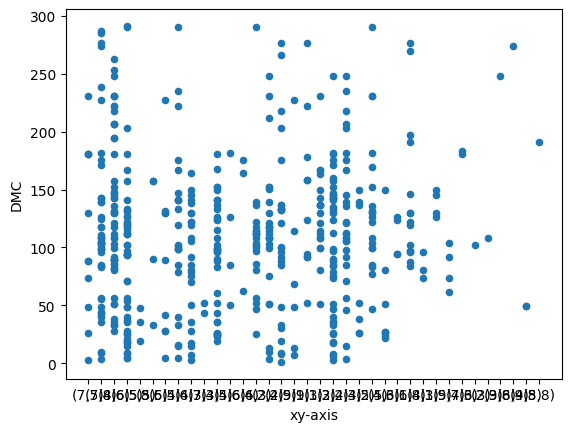

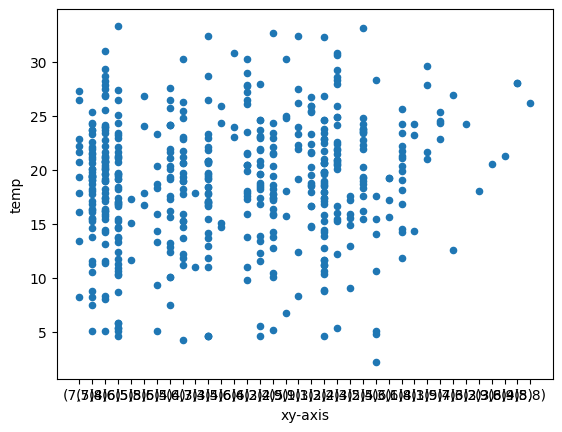

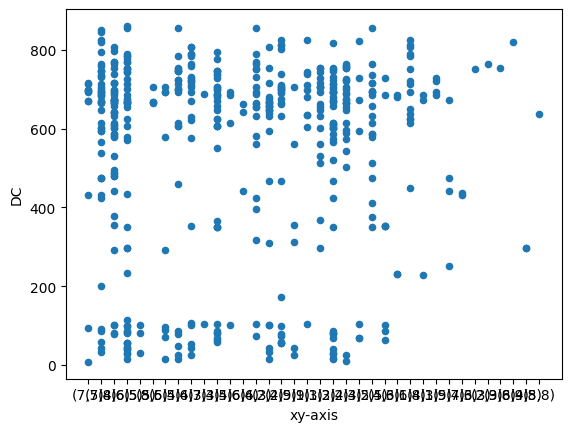

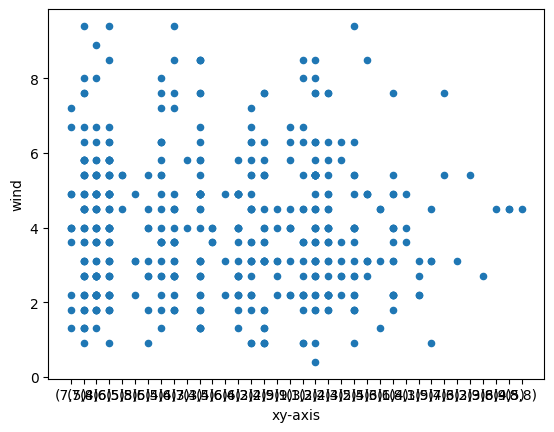

In [183]:
'''
Balanced Spread
'''
forest_tbl.plot.scatter("xy-axis","RH")
forest_tbl.plot.scatter("xy-axis","DMC")
forest_tbl.plot.scatter("xy-axis","temp")
forest_tbl.plot.scatter("xy-axis","DC")
forest_tbl.plot.scatter("xy-axis","wind")


**Spread: Imbalanced**

<br>•	Scatter plot to identify if outliers exists in imbalanced columns (FFMC, ISI, rain)–Not Equally spread data (Imbalanced Data)

<Axes: xlabel='xy-axis', ylabel='rain'>

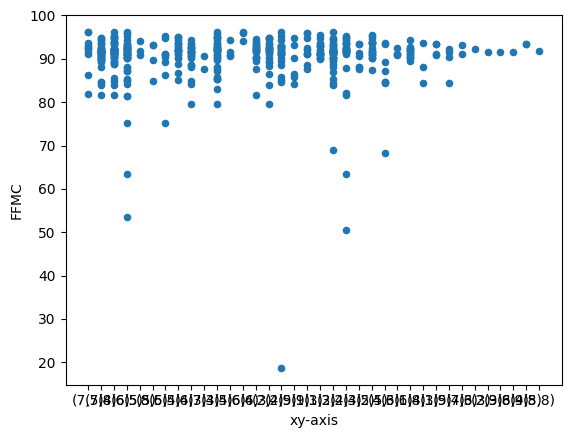

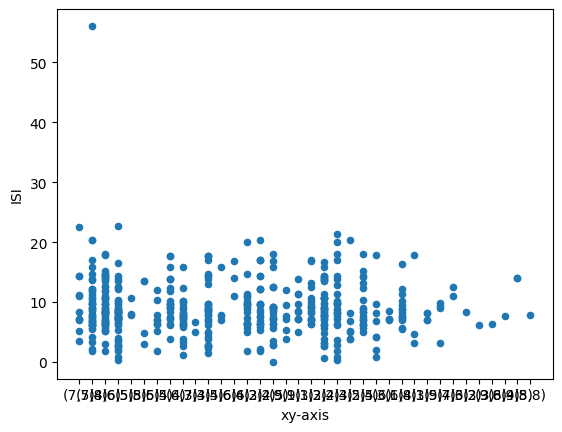

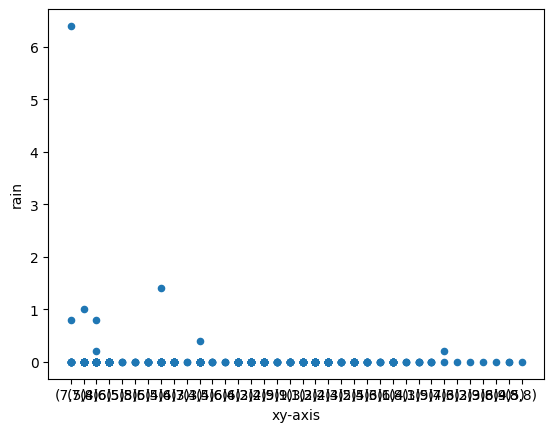

In [184]:
'''
Imbalanced Spread
'''
forest_tbl.plot.scatter("xy-axis","FFMC")
forest_tbl.plot.scatter("xy-axis","ISI")
forest_tbl.plot.scatter("xy-axis","rain")

<br>•	Since all the values are float for Balanced Data, adding all of them to implement them in Simple linear Regression model – converting them to a single independent Variable X-independent.

In [185]:
'''
Adding all of the balanced columns, this is to convert values into a single X value for simple linear equation Y= MX+C,
we already know Y = 'area', hence X will be the sum of all.
'''
forest_tbl["X-independent"] = forest_tbl["DMC"]+forest_tbl["RH"]+forest_tbl["DC"]+forest_tbl["temp"]+forest_tbl["wind"]
print(forest_tbl)

     X  Y month  day  FFMC    DMC     DC   ISI  temp  RH  wind  rain   area  \
0    7  5   mar  fri  86.2   26.2   94.3   5.1   8.2  51   6.7   0.0   0.00   
1    7  4   oct  tue  90.6   35.4  669.1   6.7  18.0  33   0.9   0.0   0.00   
2    7  4   oct  sat  90.6   43.7  686.9   6.7  14.6  33   1.3   0.0   0.00   
3    8  6   mar  fri  91.7   33.3   77.5   9.0   8.3  97   4.0   0.2   0.00   
4    8  6   mar  sun  89.3   51.3  102.2   9.6  11.4  99   1.8   0.0   0.00   
..  .. ..   ...  ...   ...    ...    ...   ...   ...  ..   ...   ...    ...   
512  4  3   aug  sun  81.6   56.7  665.6   1.9  27.8  32   2.7   0.0   6.44   
513  2  4   aug  sun  81.6   56.7  665.6   1.9  21.9  71   5.8   0.0  54.29   
514  7  4   aug  sun  81.6   56.7  665.6   1.9  21.2  70   6.7   0.0  11.16   
515  1  4   aug  sat  94.4  146.0  614.7  11.3  25.6  42   4.0   0.0   0.00   
516  6  3   nov  tue  79.5    3.0  106.7   1.1  11.8  31   4.5   0.0   0.00   

    xy-axis  X-independent  
0     (7,5)          1

**Removal of unwanted columns**
<br>•	Now selecting only, the needed columns

In [186]:
'''
Removing unwanted Columns
'''
select_cols = ["xy-axis", "month", "day","X-independent", "area"]
forest_fire_df = forest_tbl[select_cols]
print(forest_fire_df)

    xy-axis month  day  X-independent   area
0     (7,5)   mar  fri          186.4   0.00
1     (7,4)   oct  tue          756.4   0.00
2     (7,4)   oct  sat          779.5   0.00
3     (8,6)   mar  fri          220.1   0.00
4     (8,6)   mar  sun          265.7   0.00
..      ...   ...  ...            ...    ...
512   (4,3)   aug  sun          784.8   6.44
513   (2,4)   aug  sun          821.0  54.29
514   (7,4)   aug  sun          820.2  11.16
515   (1,4)   aug  sat          832.3   0.00
516   (6,3)   nov  tue          157.0   0.00

[517 rows x 5 columns]


<br>•	Scatter plot with X = X-independent & y= area

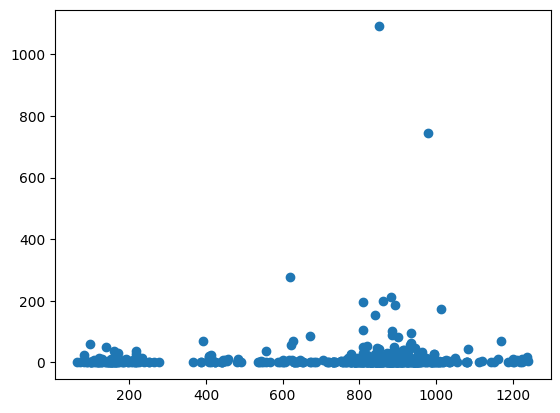

In [187]:
plt.scatter(forest_fire_df['X-independent'], forest_fire_df['area'])

**Detection & Removing of Outliers: z-score**

<br>•	Implementing z-score, since the values are spread properly for the balanced columns (x-independent), to identify outliers for such uniform distribution, z-score would be the most appropriate option, as it works well with data with uniform distribution. However, my recommendation would be to not use outlier detection for such a dataset. Hence, the zscore taken to filter out outliers would detect zero outliers for such a dataset. Zscore is measure in terms of dtandard deviation of the mean.



In [188]:
'''
Detecting and removing Outliers. For this I am using Z-score (standardization) method,
which mostly works in a uniform spread with very few outliers.
Since we have already removed imbalanced columns and only kept columns with a proper spread, hence z-score would work as the effective measure to detect outliers.
'''
forest_fire_df['X-zscore'] = zscore(forest_fire_df['X-independent'])
forest_fire_df.describe()


<ipython-input-188-0e12a31bb2b6>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  forest_fire_df['X-zscore'] = zscore(forest_fire_df['X-independent'])


,X-independent,area,X-zscore
count,517.000000,517.000000,5.170000e+02
mean,726.007350,12.847292,9.620501e-17
std,298.209787,63.655818,1.000969e+00
min,64.700000,0.000000,-2.219739e+00
25%,617.400000,0.000000,-3.645505e-01
50%,840.500000,0.520000,3.843051e-01
75%,914.000000,6.570000,6.310146e-01
max,1240.800000,1090.840000,1.727949e+00


<br>•	After filtering out no outliers were detected for this dataset.

In [189]:
'''filtering out dataset on the basis of 75th percentile approximately'''
forest_fire_df =  forest_fire_df[forest_fire_df['X-zscore'] <6.3]
forest_fire_df

,xy-axis,month,day,X-independent,area,X-zscore
0,"(7,5)",mar,fri,186.4,0.00,-1.811242
1,"(7,4)",oct,tue,756.4,0.00,0.102016
2,"(7,4)",oct,sat,779.5,0.00,0.179553
3,"(8,6)",mar,fri,220.1,0.00,-1.698124
4,"(8,6)",mar,sun,265.7,0.00,-1.545064
...,...,...,...,...,...,...
512,"(4,3)",aug,sun,784.8,6.44,0.197343
513,"(2,4)",aug,sun,821.0,54.29,0.318852
514,"(7,4)",aug,sun,820.2,11.16,0.316166
515,"(1,4)",aug,sat,832.3,0.00,0.356781


<br>•	Scatter plot after outlier detection remains the same.

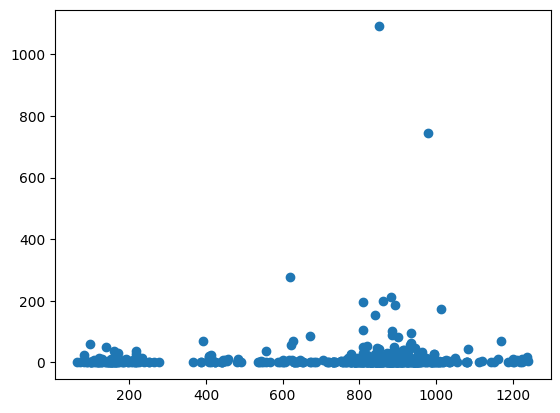

In [190]:
''' Giving X and Y values '''

X = forest_fire_df['X-independent']
Y = forest_fire_df['area']
plt.scatter(X,Y)

**4.1 Split the dataset into training and test sets**

**CASE 1 - Train = 20%, Test = 80%**
<br>•	Using simple linear regression we first start with

In [191]:
''''
Starting with Training our regression model, providing  criteria with Test Sizes
CASE 1 : Train = 20% Test = 80%
Assigning Variables
'''
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.8, random_state = 33)
'''shaping X_train as an array'''
X_train = np.array(X_train).reshape(-1,1)
X_train

array([[ 835.9],
       [ 408.1],
       [ 182.3],
       [ 911.5],
       [ 171.6],
       [ 119.8],
       [ 962. ],
       [1003.4],
       [ 901.3],
       [ 880.8],
       [ 844.1],
       [ 788.3],
       [ 887.1],
       [ 859.4],
       [ 820.2],
       [ 898. ],
       [ 852.6],
       [ 851.6],
       [ 955. ],
       [ 794. ],
       [ 878.5],
       [ 536.8],
       [ 765.4],
       [ 910.3],
       [ 891.6],
       [ 278.6],
       [  97.5],
       [ 847.6],
       [ 987. ],
       [ 942.8],
       [ 926.7],
       [ 862.6],
       [ 490.7],
       [ 588.5],
       [ 794.7],
       [ 990. ],
       [ 413.7],
       [ 785.3],
       [  89.2],
       [  64.7],
       [ 754.7],
       [ 218.8],
       [ 194.8],
       [ 766.4],
       [ 209.8],
       [ 771.6],
       [ 897.3],
       [ 832.6],
       [1036.3],
       [1199.8],
       [ 946.8],
       [ 412.7],
       [ 942.7],
       [ 861.5],
       [ 989.6],
       [ 174.5],
       [ 844.7],
       [1012.3],
       [ 899. 

In [192]:
'''shaping X_Test as an array'''
X_test = np.array(X_test).reshape(-1,1)
X_test

array([[ 991.4],
       [ 953.1],
       [ 849.4],
       [ 867.4],
       [ 933. ],
       [ 842.7],
       [ 731. ],
       [1055.5],
       [ 651.2],
       [ 155.3],
       [ 905. ],
       [  82.4],
       [ 165.5],
       [ 114.5],
       [ 850.6],
       [ 139.3],
       [ 799.2],
       [ 413.7],
       [ 796.7],
       [ 978. ],
       [ 881.7],
       [1034. ],
       [1118.9],
       [ 148.4],
       [ 990. ],
       [ 966.7],
       [ 974. ],
       [  96.3],
       [  72.2],
       [ 265.7],
       [ 885.6],
       [1003.7],
       [ 790.1],
       [ 157. ],
       [1111.9],
       [1014.3],
       [ 674.4],
       [ 946.9],
       [1026.8],
       [ 734.1],
       [ 831.4],
       [ 886.2],
       [1000.1],
       [ 931.6],
       [ 943.8],
       [ 924.6],
       [1080.8],
       [ 730.3],
       [ 186.4],
       [ 820.2],
       [ 894. ],
       [ 901.3],
       [ 882. ],
       [ 908.1],
       [1240.8],
       [ 847.6],
       [ 484.6],
       [ 958.4],
       [ 910.4

**4.2  K-FOLD Model - validation**

<br>K-fold validation gives us an opportunity to split data in n-number of ways without repeating steps as we did earlier. This is an easy effective method to find the right ratio between training and testing to get the best fit for our machine learning model.

In [193]:
'''K-FOLD Model'''
'''importing library'''
from sklearn.model_selection import KFold
'''specifying k-fold to give 3 splits'''
kf = KFold(n_splits = 3)
kf

KFold(n_splits=3, random_state=None, shuffle=False)

In [194]:
'''Specifying splits for forestfire dataframe'''
for train_index, test_index in kf.split(forest_fire_df):
  print(train_index, test_index)

[173 174 175 176 177 178 179 180 181 182 183 184 185 186 187 188 189 190
 191 192 193 194 195 196 197 198 199 200 201 202 203 204 205 206 207 208
 209 210 211 212 213 214 215 216 217 218 219 220 221 222 223 224 225 226
 227 228 229 230 231 232 233 234 235 236 237 238 239 240 241 242 243 244
 245 246 247 248 249 250 251 252 253 254 255 256 257 258 259 260 261 262
 263 264 265 266 267 268 269 270 271 272 273 274 275 276 277 278 279 280
 281 282 283 284 285 286 287 288 289 290 291 292 293 294 295 296 297 298
 299 300 301 302 303 304 305 306 307 308 309 310 311 312 313 314 315 316
 317 318 319 320 321 322 323 324 325 326 327 328 329 330 331 332 333 334
 335 336 337 338 339 340 341 342 343 344 345 346 347 348 349 350 351 352
 353 354 355 356 357 358 359 360 361 362 363 364 365 366 367 368 369 370
 371 372 373 374 375 376 377 378 379 380 381 382 383 384 385 386 387 388
 389 390 391 392 393 394 395 396 397 398 399 400 401 402 403 404 405 406
 407 408 409 410 411 412 413 414 415 416 417 418 41

In [195]:
''' Creating a reference class for Linear Regression'''
lr = LinearRegression()
'''Model fitting X_train values and y_Train values'''
lr.fit(X_train, Y_train)

LinearRegression()

**4.3 Model Building**
<br>Once training and testing is done we build our regression model, by calling regression class from sklearn library. First fit the training data, test the output y of the training data, plot the graph to check if the regression line is the best fit, then fit the model to test data. Plot again to view the regression line.

**Getting the intercept m for y=mx+c**

In [196]:
'''Getting the intercept m for y=mx+c'''
c = lr.intercept_
print("C:", c)

C: 2.075837377686625


In [197]:
''' Getting the Coefficient c for y=mx+c'''
m = lr.coef_
print("M:", m)

M: [0.02841166]


**Testing by putting these values in y=mx+c**

In [198]:
'''testing by putting these values in y=mx+c'''
y_pred_manual = m*X_train+c
# y_pred_manual

**Predicting y train model**

In [199]:
''' Predicting y train model '''
Y_pred_train = lr.predict(X_train)
# Y_pred_train

**Plotting training model to verify that the equation line is the best fit**

Equation line to verify if the training set is correct.

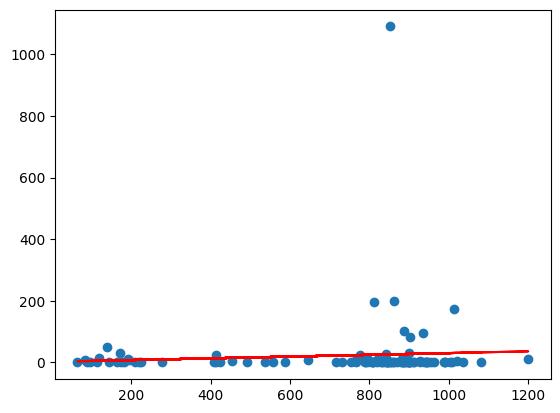

In [200]:
''' Plotting training model to verify that the equation line is the best fit '''
plt.scatter(X_train, Y_train)
plt.plot(X_train, Y_pred_train, color = 'red')

**Predicted Y values**

In [201]:
y_pred_test = lr.predict(X_test)
y_pred_test

array([30.24316055, 29.15499384, 26.20870433, 26.72011428, 28.5839194 ,
       26.01834619, 22.84476338, 32.06434818, 20.57751263,  6.48816872,
       27.78839282,  4.41695845,  6.77796768,  5.32897285, 26.24279833,
        6.0335821 , 24.78243883, 13.82974256, 24.71140967, 29.86244426,
       27.12640106, 31.45349741, 33.86564764,  6.29212824, 30.20338422,
       29.54139246, 29.7487976 ,  4.81188057,  4.12715948,  9.62481636,
       27.23720655, 30.59262401, 24.52389269,  6.53646854, 33.666766  ,
       30.89378764, 21.23666323, 28.97884152, 31.24893343, 22.93283954,
       25.69729439, 27.25425355, 30.49034202, 28.54414307, 28.89076537,
       28.34526143, 32.78316326, 22.82487521,  7.37177145, 25.37908376,
       27.47586452, 27.68326967, 27.13492456, 27.87646898, 37.32902942,
       26.15756334, 15.8441295 , 29.30557565, 27.94181581, 31.45349741,
       26.237116  , 17.53178231,  5.6954833 , 26.13767518, 25.29384877,
       27.14913039, 24.68583917, 23.56641963, 30.31987204,  5.76

**Plotting equation with the predicted Y-values**

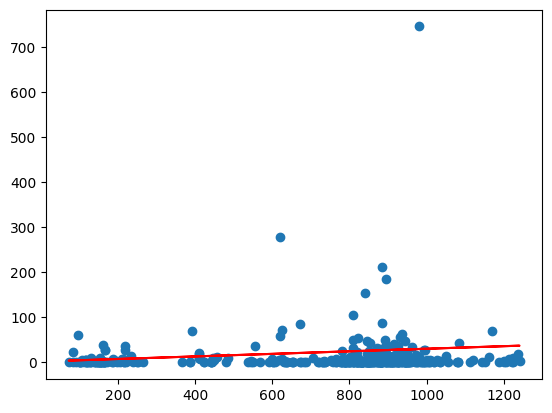

In [202]:
plt.scatter(X_test, Y_test)
plt.plot(X_test, y_pred_test, color = 'red')

In [203]:
def get_score(model, X_train,X_test,y_train, y_test):
  model.fit(X_train,y_train)
  return model.score(X_test, y_test)

**Evaluation Metrics:**

In [204]:
print("CASE 1 - Train = 20%, Test = 80%\n")
print('Coefficient = ', m)
print('Intercept = ', c)
print("Score of the Model", get_score(LinearRegression(),X_train,X_test,Y_train, Y_test))
print("Variance using R2-Score of model is ", 100*r2_score(Y_test, y_pred_test))
print("Root Mean squared error (TEST): %.2f" % np.sqrt(mean_squared_error(Y_test, y_pred_test)))
print("Root Mean squared error (TRAIN): %.2f" % np.sqrt(mean_squared_error(Y_train, Y_pred_train)))

CASE 1 - Train = 20%, Test = 80%

Coefficient =  [0.02841166]
Intercept =  2.075837377686625
Score of the Model -0.09503139845982678
Variance using R2-Score of model is  -9.503139845982677
Root Mean squared error (TEST): 45.91
Root Mean squared error (TRAIN): 111.27


**Also, try to split the dataset with different ratios of your choice**




**CASE 2 - Train = 50%, Test = 50%**

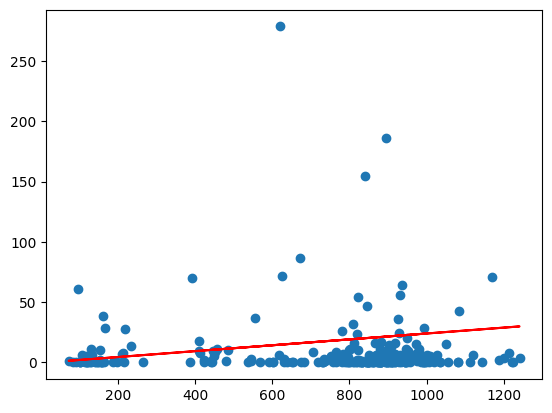

In [205]:
'''CASE 2 - Train = 50%, Test = 50%'''
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.5, random_state = 33)
'''shaping X_train as an array'''
X_train = np.array(X_train).reshape(-1,1)
X_train
'''shaping X_Test as an array'''
X_test = np.array(X_test).reshape(-1,1)
X_test
''' Creating a reference class for Linear Regression'''
lr = LinearRegression()
'''Model fitting X_train values and y_Train values'''
lr.fit(X_train, Y_train)
'''Getting the intercept m for y=mx+c'''
c = lr.intercept_
# print('Intercept = ',c)
''' Getting the Coefficient c for y=mx+c'''
m = lr.coef_
# print('Coefficient = ',m)
''' Predicting y train model '''
Y_pred_train = lr.predict(X_train)
''' Plotting training model to verify that the equation line is the best fit'''
y_pred_test = lr.predict(X_test)
y_pred_test
plt.scatter(X_test, Y_test)
plt.plot(X_test, y_pred_test, color = 'red')

**Evaluation metrics:**

In [206]:
print("CASE 2 - Train = 50%, Test = 50%\n")
print('Coefficient = ',m)
print('Intercept = ',c)
print("Score of the Model", get_score(LinearRegression(),X_train,X_test,Y_train, Y_test))
print("Variance using R2-Score of model is ", 100*r2_score(Y_test, y_pred_test))
print("Root Mean squared error (TEST): %.2f" % np.sqrt(mean_squared_error(Y_test, y_pred_test)))
print("Root Mean squared error (TRAIN): %.2f" % np.sqrt(mean_squared_error(Y_train, Y_pred_train)))

CASE 2 - Train = 50%, Test = 50%

Coefficient =  [0.02437629]
Intercept =  -0.3548941432062769
Score of the Model -0.20035830047438918
Variance using R2-Score of model is  -20.035830047438917
Root Mean squared error (TEST): 28.34
Root Mean squared error (TRAIN): 85.69


---
**CASE 3 - Train = 70%, Test = 30%**

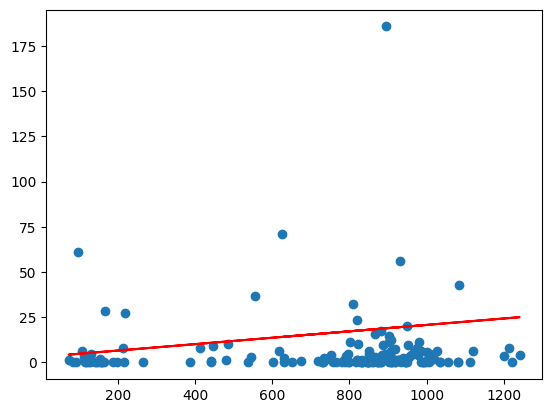

In [207]:
'''CASE 3 - Train = 70%, Test = 30%'''
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.3, random_state = 33)
'''shaping X_train as an array'''
X_train = np.array(X_train).reshape(-1,1)
X_train
'''shaping X_Test as an array'''
X_test = np.array(X_test).reshape(-1,1)
X_test
''' Creating a reference class for Linear Regression'''
lr = LinearRegression()
'''Model fitting X_train values and y_Train values'''
lr.fit(X_train, Y_train)
'''Getting the intercept m for y=mx+c'''
c = lr.intercept_
# print('Intercept = ',c)
''' Getting the Coefficient c for y=mx+c'''
m = lr.coef_
# print('Coefficient = ',m)
''' Predicting y train model '''
Y_pred_train = lr.predict(X_train)
''' Plotting training model to verify that the equation line is the best fit'''
y_pred_test = lr.predict(X_test)
y_pred_test
plt.scatter(X_test, Y_test)
plt.plot(X_test, y_pred_test, color = 'red')

**Evaluation metrics:**


In [208]:
print("CASE 3 - Train = 70%, Test = 30%\n")
print('Coefficient = ',m)
print('Intercept = ',c)
print("Score of the Model", get_score(LinearRegression(),X_train,X_test,Y_train, Y_test))
print("Variance using R2-Score of model is ", 100*r2_score(Y_test, y_pred_test))
print("Root Mean squared error (TEST): %.2f" % np.sqrt(mean_squared_error(Y_test, y_pred_test)))
print("Root Mean squared error (TRAIN): %.2f" % np.sqrt(mean_squared_error(Y_train, Y_pred_train)))

CASE 3 - Train = 70%, Test = 30%

Coefficient =  [0.01772004]
Intercept =  3.0524252377227565
Score of the Model -0.40894680869855704
Variance using R2-Score of model is  -40.894680869855705
Root Mean squared error (TEST): 21.33
Root Mean squared error (TRAIN): 74.81


---
**CASE 4 - Train = 80%, Test = 20%**


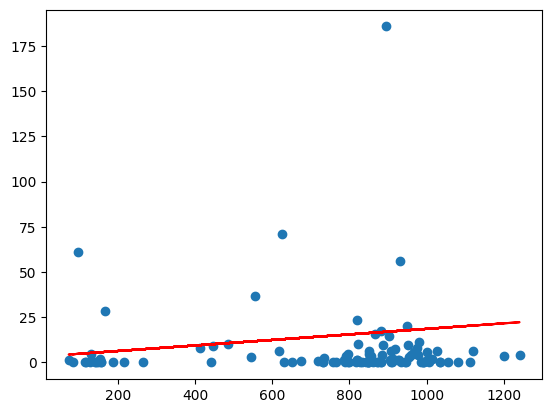

In [209]:
'''CASE 4 - Train = 80%, Test = 20%'''
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.2, random_state = 33)
'''shaping X_train as an array'''
X_train = np.array(X_train).reshape(-1,1)
X_train
'''shaping X_Test as an array'''
X_test = np.array(X_test).reshape(-1,1)
X_test
''' Creating a reference class for Linear Regression'''
lr = LinearRegression()
'''Model fitting X_train values and y_Train values'''
lr.fit(X_train, Y_train)
'''Getting the intercept m for y=mx+c'''
c = lr.intercept_
# print('Intercept = ',c)
''' Getting the Coefficient c for y=mx+c'''
m = lr.coef_
# print('Coefficient = ',m)
''' Predicting y train model '''
Y_pred_train = lr.predict(X_train)
''' Plotting training model to verify that the equation line is the best fit'''
y_pred_test = lr.predict(X_test)
y_pred_test
plt.scatter(X_test, Y_test)
plt.plot(X_test, y_pred_test, color = 'red')

**Evaluation metrics:**


In [210]:
print("CASE 4 - Train = 80%, Test = 20%\n")
print('Coefficient = ',m)
print('Intercept = ',c)
print("Score of the Model", get_score(LinearRegression(),X_train,X_test,Y_train, Y_test))
print("Variance using R2-Score of model is ", 100*r2_score(Y_test, y_pred_test))
print("Root Mean squared error (TEST): %.2f" % np.sqrt(mean_squared_error(Y_test, y_pred_test)))
print("Root Mean squared error (TRAIN): %.2f" % np.sqrt(mean_squared_error(Y_train, Y_pred_train)))

CASE 4 - Train = 80%, Test = 20%

Coefficient =  [0.01528845]
Intercept =  3.291116889393381
Score of the Model -0.18338725272665357
Variance using R2-Score of model is  -18.338725272665357
Root Mean squared error (TEST): 23.02
Root Mean squared error (TRAIN): 70.13




---



**5. Performance Evaluation**

**5.1**

For train data = 80% and test data = 20%
From the above calculations we know that the intercept is = 3.291116889393381 & coefficient = 0.01528845 (please note that in the model these values are constantly interchanging due to the selection made by the program of splitting the data). However, above we first calculate values by putting the values in the equation y= mx + c, which gives us below output.

**5.2**

This model fits well as it approximately picks up maximum data points, hence neither over fitting nor under fitting.
Underfitting would have been when the regression line was going away from the data points, in this scenario, its not the case.
Over fitting would have been when the regression line was getting curved to fit all the data points. For example, between 800 to 1000 there is a big cluster chunk, an overfit model would have curved the line to fit the model, by attempting to touch all of the data points.
Hence, our model fits perfectly for the current case.





---



In [211]:
# !jupyter nbconvert --to html /content/Group24_forestfireData.ipynb